## Perform descriptive analytics to create a customer profile for each CardioGood Fitness tradmill product line.

In [1]:
# Load the necessary packages
import numpy as np 
import pandas as pd


In [2]:
#load the cardio dataset
mydata = pd.read_csv("CardioGoodFitness.csv")

In [3]:
mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
mydata.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ed791a850>,
      dtype=object)

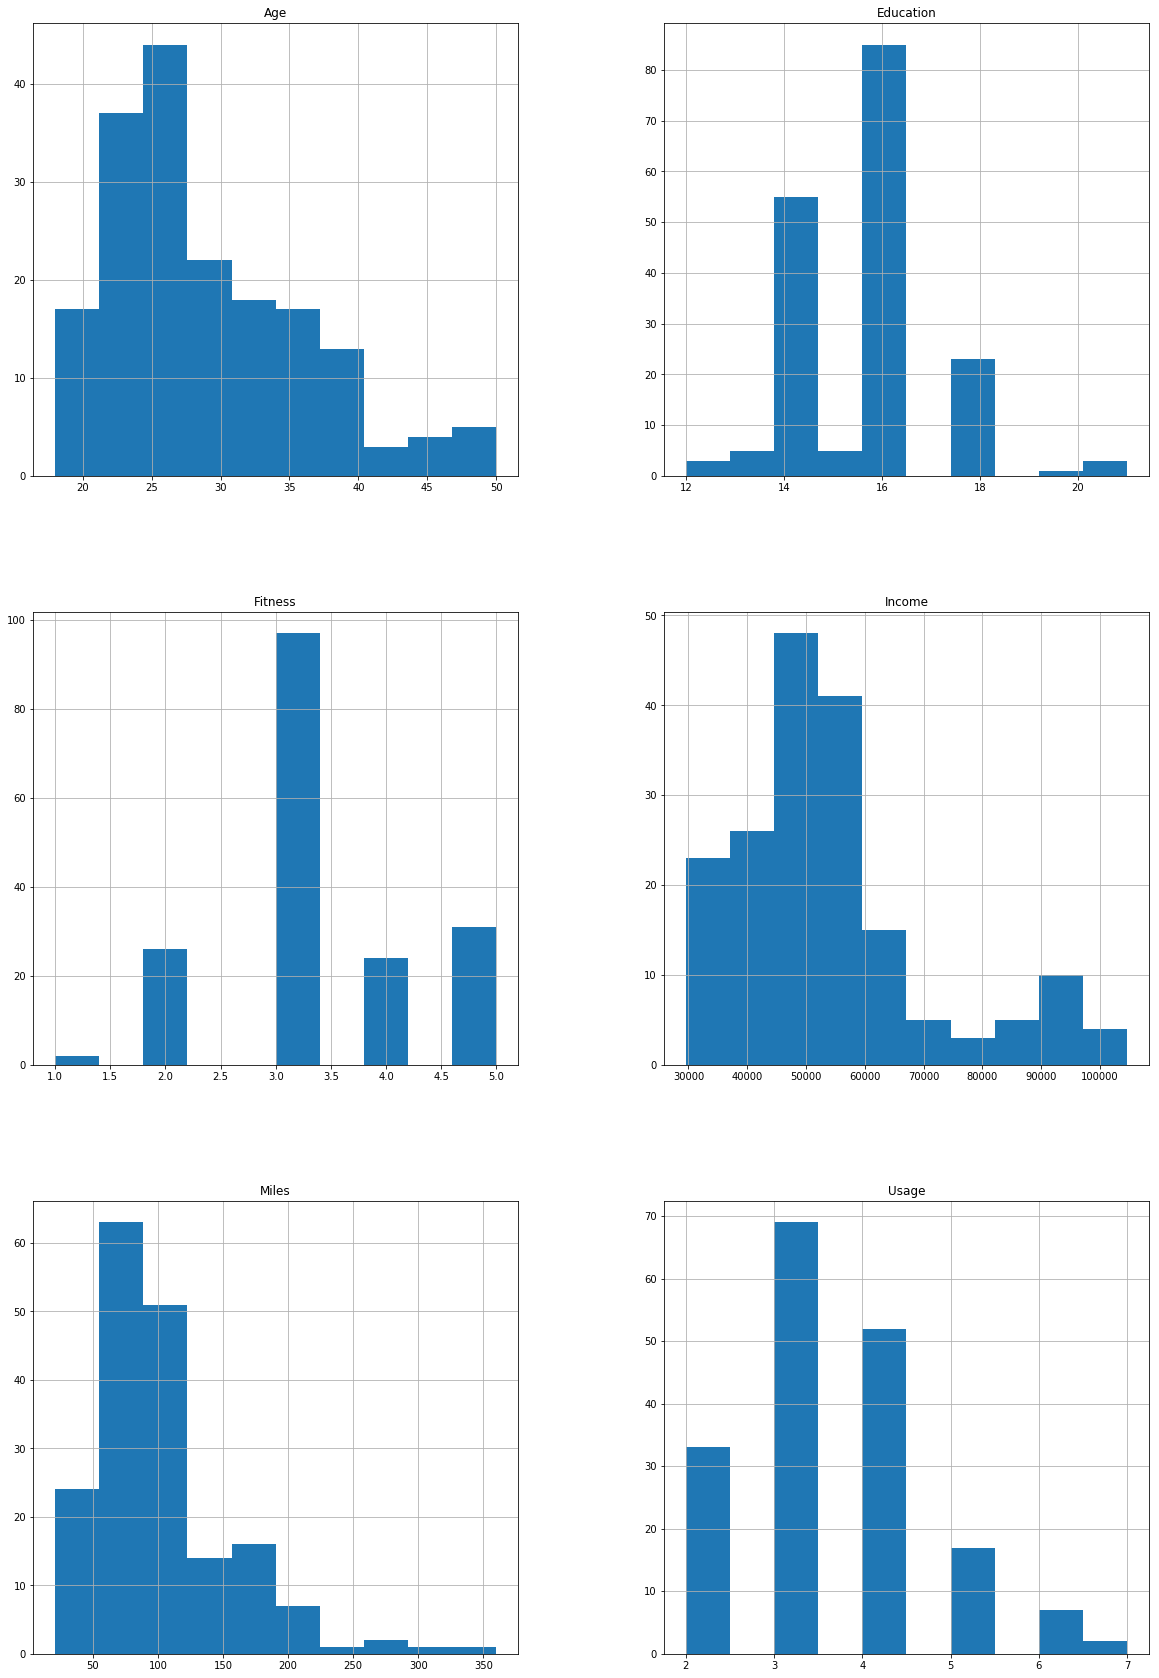

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


mydata.hist(figsize=(20,30))

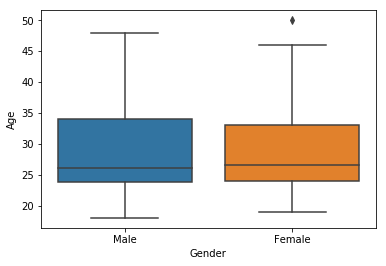

In [9]:
import seaborn as sns

sns.boxplot(x="Gender",y="Age",data=mydata)

In [10]:
pd.crosstab(mydata['Product'],mydata['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


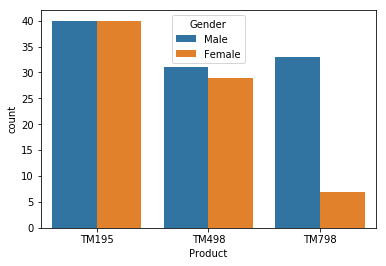

In [11]:
sns.countplot(x="Product",hue="Gender",data=mydata)

In [13]:
pd.pivot_table(mydata,index=['Product','Gender'],columns=['MaritalStatus'],aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [14]:
pd.pivot_table(mydata,'Income',index=['Product','Gender'],columns=['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

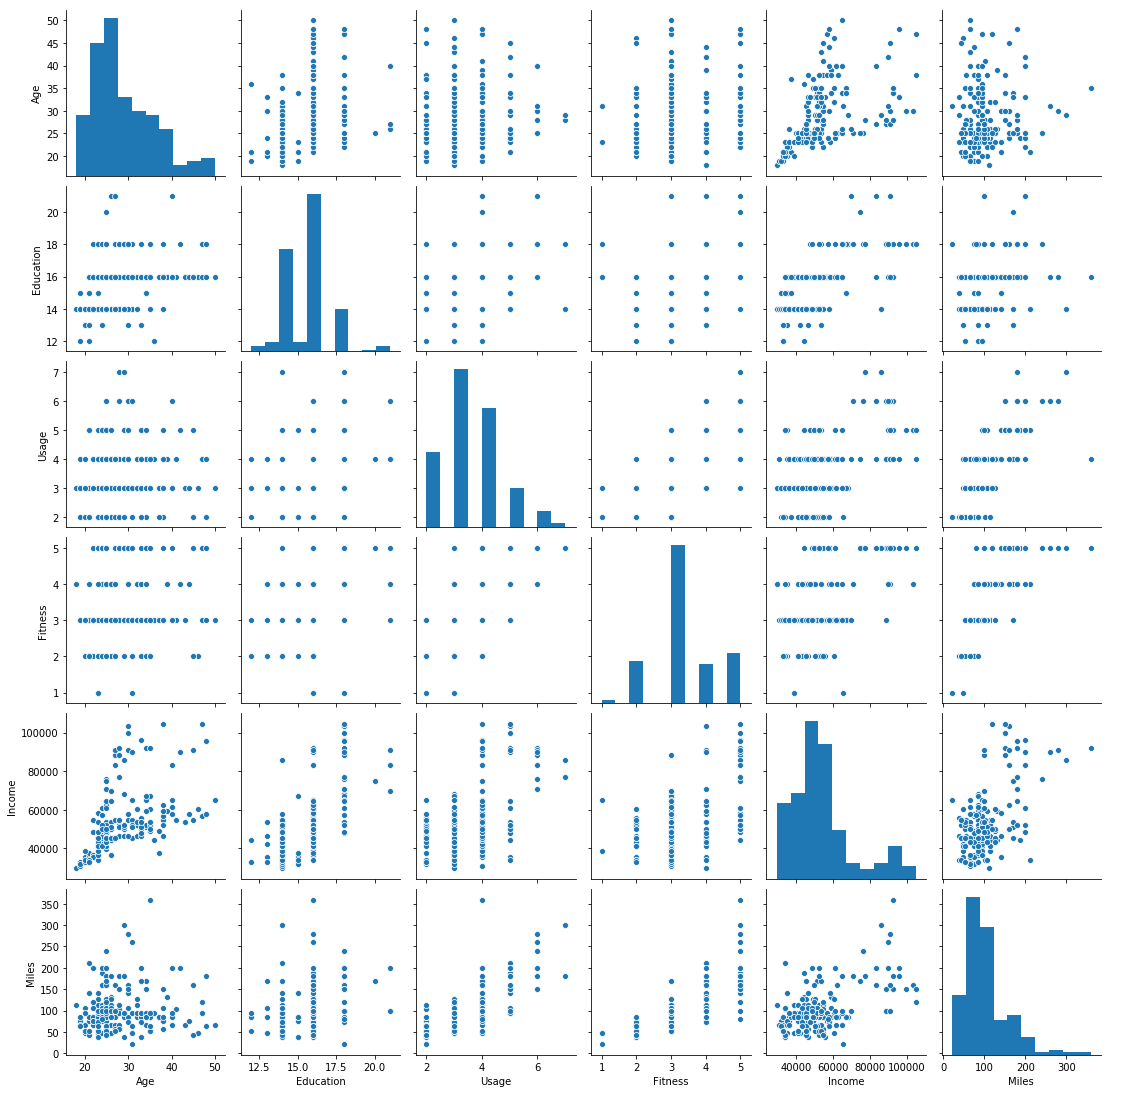

In [15]:
sns.pairplot(mydata)

In [16]:
mydata['Age'].std()


6.943498135399795

In [18]:
mydata['Age'].mean()

28.788888888888888

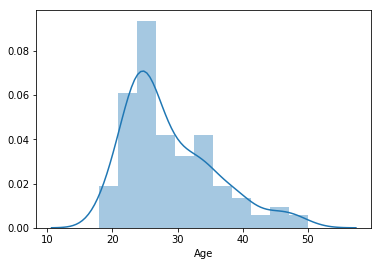

In [19]:
sns.distplot(mydata['Age'])

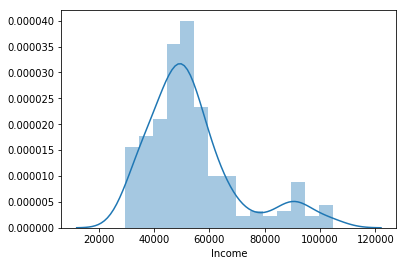

In [20]:
sns.distplot(mydata['Income'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ecb058150>,
      dtype=object)

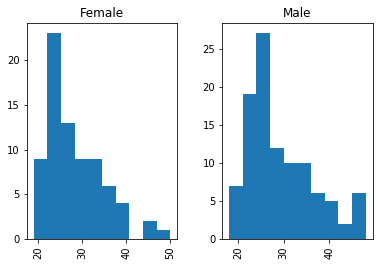

In [21]:
mydata.hist(by="Gender",column='Age')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ec96bd950>,
      dtype=object)

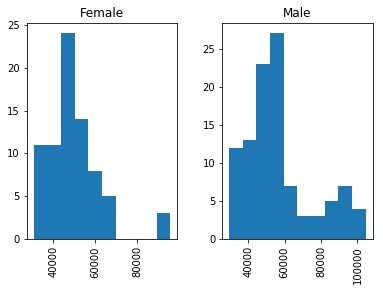

In [22]:
mydata.hist(by="Gender",column='Income')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ec95bc210>,
      dtype=object)

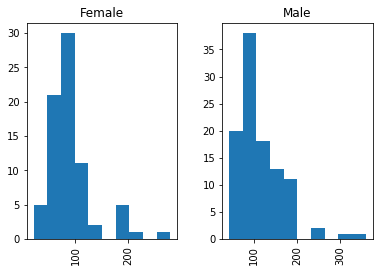

In [23]:
mydata.hist(by="Gender",column='Miles')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ec969d190>,
      dtype=object)

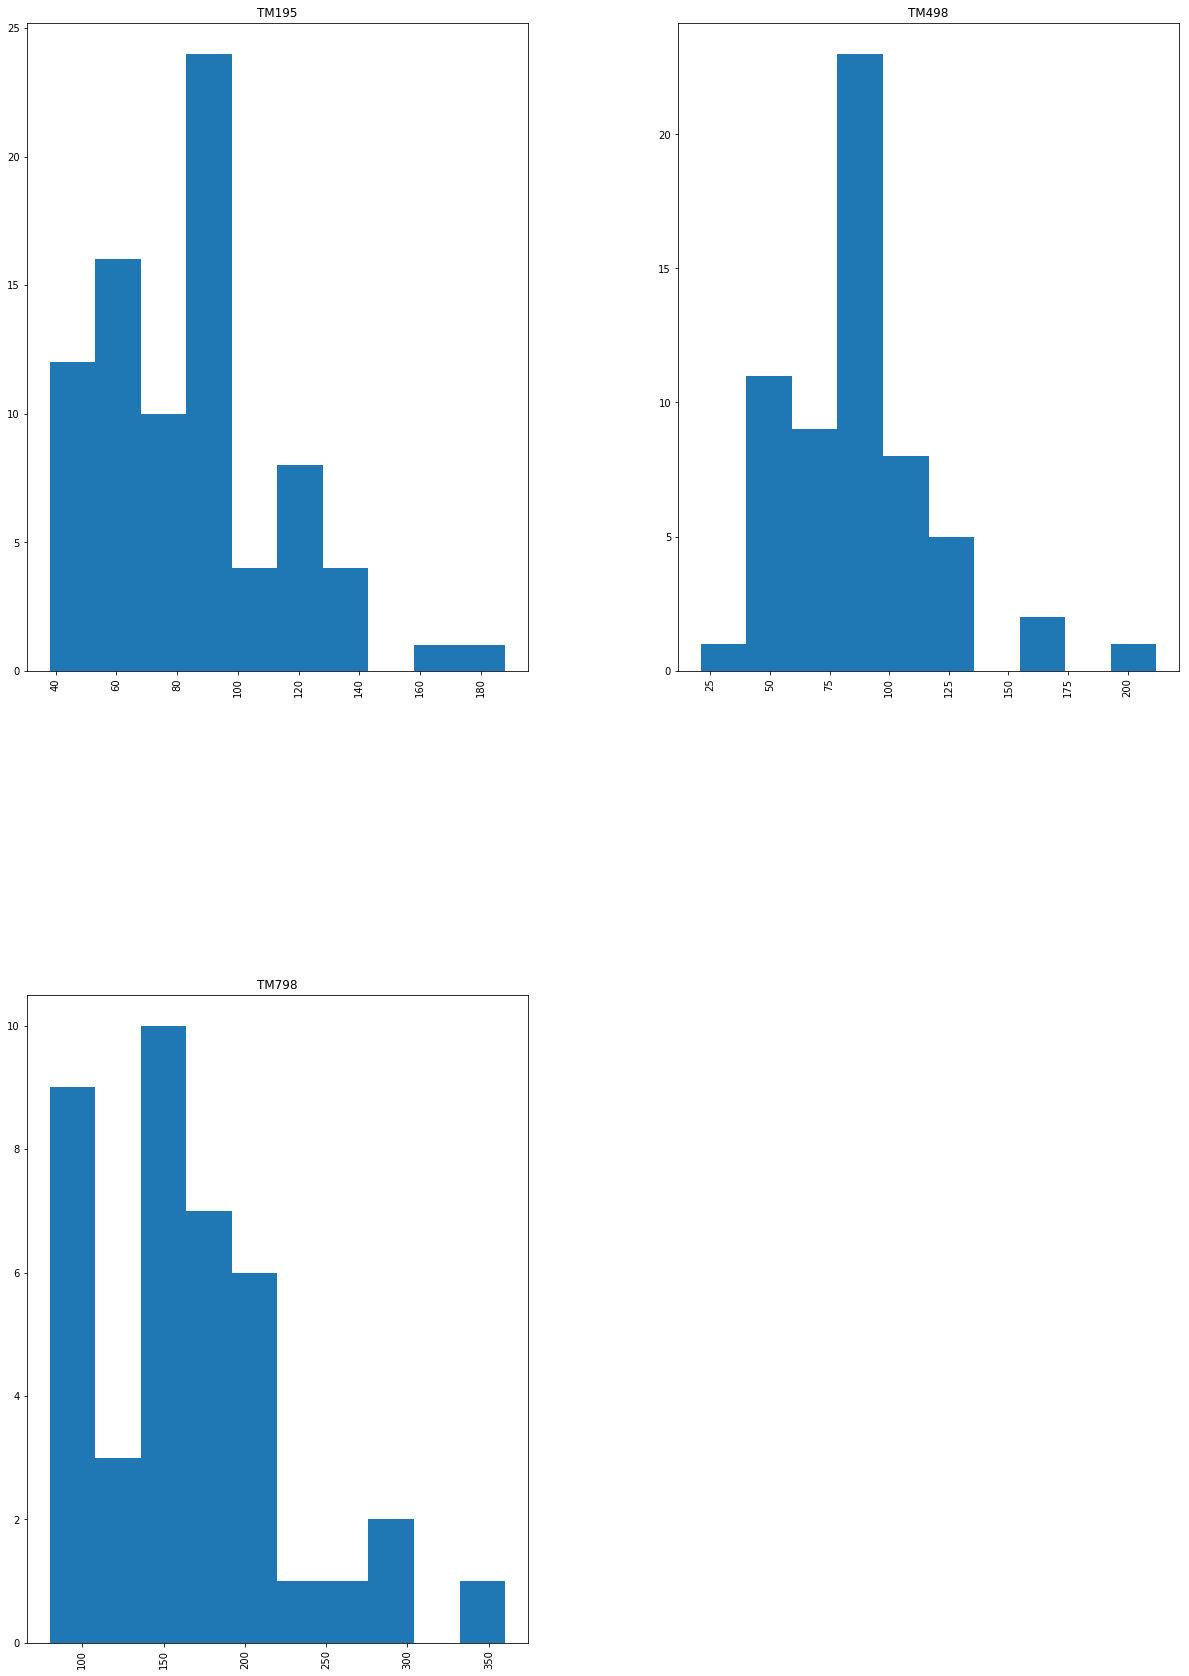

In [24]:
mydata.hist(by="Product",column='Miles',figsize=(20,30))

In [25]:
corr = mydata.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


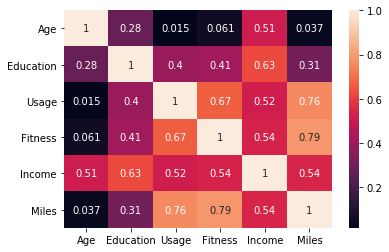

In [26]:
sns.heatmap(corr,annot=True)

In [30]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
x=mydata[['Usage']]
y=mydata['Miles']
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
model.coef_

array([36.29364912])

In [32]:
model.intercept_


-22.220276400464215

In [33]:
#MilesPredicted = -22.22 + 36.29*Usage

In [34]:
mydata.Miles

0      112
1       75
2       66
3       85
4       47
5       66
6       75
7       85
8      141
9       85
10      85
11      66
12      75
13      75
14      47
15      75
16     103
17      94
18     113
19      38
20     113
21      94
22      94
23     188
24     113
25      47
26      75
27      75
28      56
29      47
      ... 
150    120
151    160
152    200
153    100
154    180
155    240
156    170
157    100
158    180
159    160
160    100
161    100
162    180
163    180
164    150
165    180
166    300
167    280
168    160
169    150
170    260
171    200
172    150
173    360
174    150
175    200
176    200
177    160
178    120
179    180
Name: Miles, Length: 180, dtype: int64

In [35]:
mydata.Miles.mean()

103.19444444444444

In [37]:
mydata.Miles.std()

51.86360466180931

In [38]:
mydata.Miles.var()

2689.8334885164486

In [40]:
mydata.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [41]:
mydata.Usage.var()

1.1767846058348852

In [42]:
mydata.mean()

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64